# PREPARAÇÃO DOS DADOS

1 - Extração do Arquivo Tratado

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do arquivo tratado
dados = pd.read_csv("dados_tratados.csv")

# Remover linhas com Cancelou = nulo
dados = dados.dropna(subset=["Cancelou"])

print("Formato após carregamento:", dados.shape)
dados.head()


Formato após carregamento: (7043, 21)


,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


2 - Remoção de Colunas Irrelevantes

In [30]:
# Exemplo: se houvesse uma coluna ID ou nome do cliente, removemos
colunas_irrelevantes = ["ID_Cliente"]

dados = dados.drop(columns=colunas_irrelevantes, errors="ignore")

print("Formato após remoção de colunas irrelevantes:", dados.shape)


Formato após remoção de colunas irrelevantes: (7043, 20)


3 - Encoding (Transformação de variáveis categóricas)

In [31]:
from sklearn.preprocessing import LabelEncoder

# Separar target
y = dados["Cancelou"]
X = dados.drop(columns=["Cancelou"])

# Encoding do target (Sim/Não → 1/0)
y = LabelEncoder().fit_transform(y)

# Encoding das variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

print("Formato após encoding:", X_encoded.shape)


Formato após encoding: (7043, 30)


4 - Verificação da Proporção de Evasão

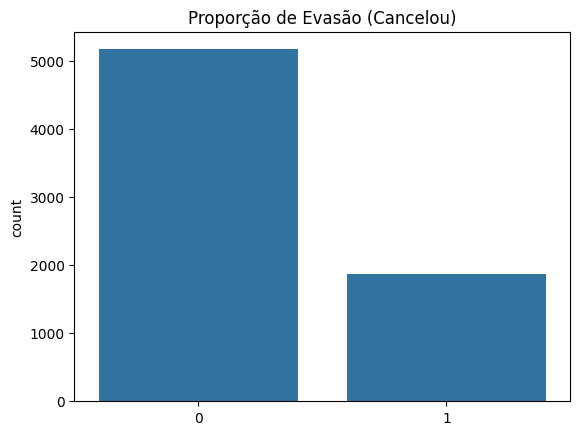

Distribuição:
0 → 5174 (73.46%)
1 → 1869 (26.54%)


In [32]:
# Distribuição do target
sns.countplot(x=y)
plt.title("Proporção de Evasão (Cancelou)")
plt.show()

unique, counts = np.unique(y, return_counts=True)
print("Distribuição:")
for u, c in zip(unique, counts):
    print(f"{u} → {c} ({c/len(y):.2%})")


5 - Balanceamento de Classes (opcional)

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_encoded, y)

print("Formato após balanceamento:", X_bal.shape)
print("Distribuição balanceada:")
unique, counts = np.unique(y_bal, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{u} → {c}")


Formato após balanceamento: (10348, 30)
Distribuição balanceada:
0 → 5174
1 → 5174


6 - Normalização ou Padronização

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)

print("Formato após padronização:", X_scaled.shape)


Formato após padronização: (10348, 30)


# CORRELAÇÃO E SELEÇÃO DE VARIÁVEIS

7 - Análise de Correlação

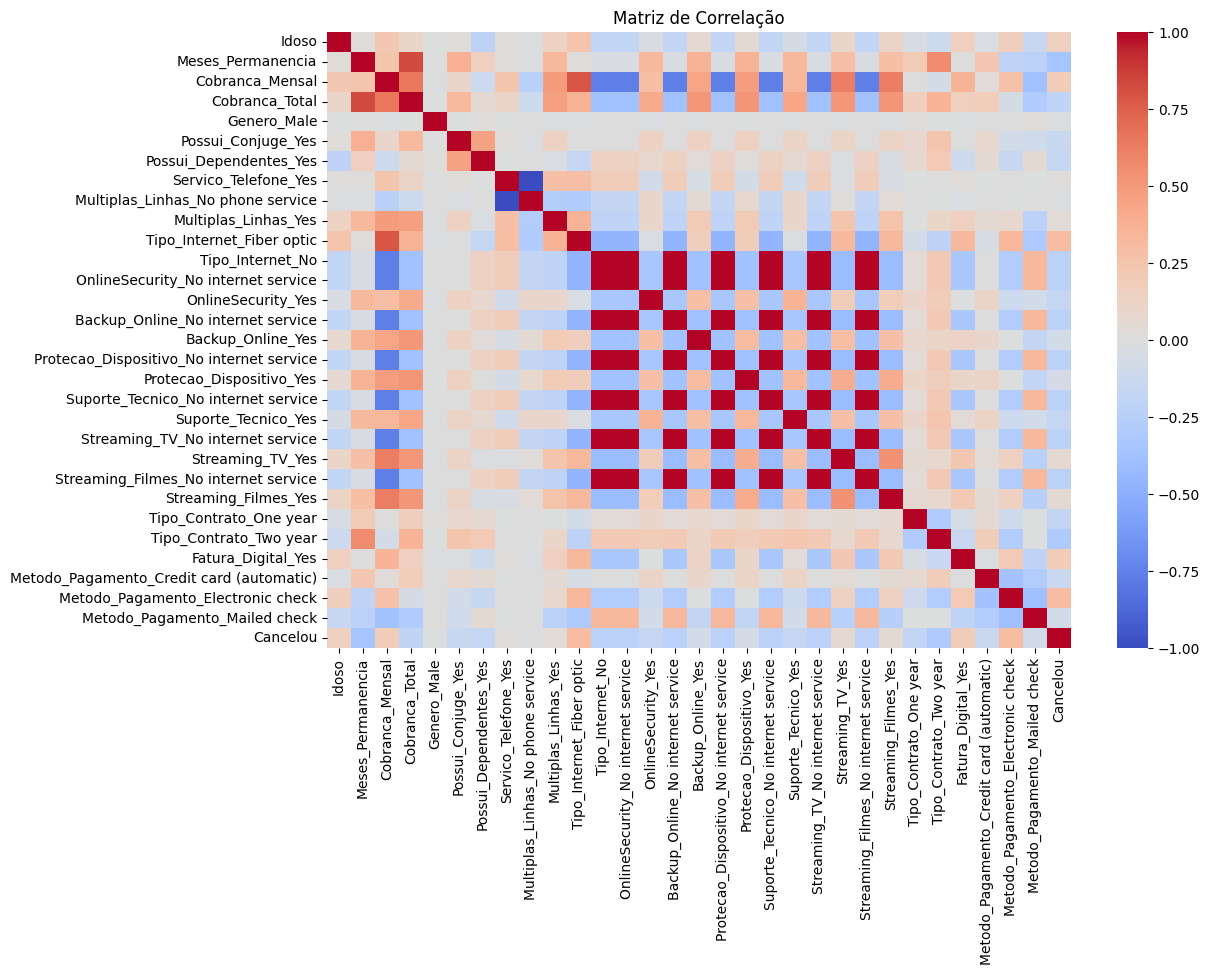

Correlação com Cancelou:
Cancelou                             1.000000
Tipo_Internet_Fiber optic            0.308020
Metodo_Pagamento_Electronic check    0.301919
Cobranca_Mensal                      0.193356
Fatura_Digital_Yes                   0.191825
Idoso                                0.150889
Streaming_TV_Yes                     0.063228
Streaming_Filmes_Yes                 0.061382
Multiplas_Linhas_Yes                 0.040102
Servico_Telefone_Yes                 0.011942
Genero_Male                         -0.008612
Multiplas_Linhas_No phone service   -0.011942
Protecao_Dispositivo_Yes            -0.066160
Backup_Online_Yes                   -0.082255
Metodo_Pagamento_Mailed check       -0.091683
Name: Cancelou, dtype: float64


In [35]:
# Converter X_encoded para DataFrame (se ainda estiver como numpy)
if not isinstance(X_encoded, pd.DataFrame):
    X_encoded = pd.DataFrame(X_encoded)

# Adicionar o target para análise conjunta
dados_corr = X_encoded.copy()
dados_corr["Cancelou"] = y

# Matriz de correlação
corr_matrix = dados_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação")
plt.show()

# Mostrar as maiores correlações com a variável alvo "Cancelou"
correlacoes_com_target = corr_matrix["Cancelou"].sort_values(ascending=False)
print("Correlação com Cancelou:")
print(correlacoes_com_target.head(15))


8 - Análises Direcionadas

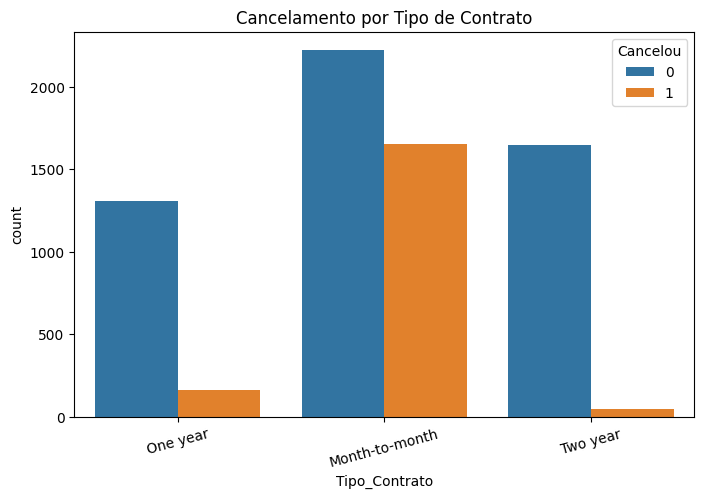

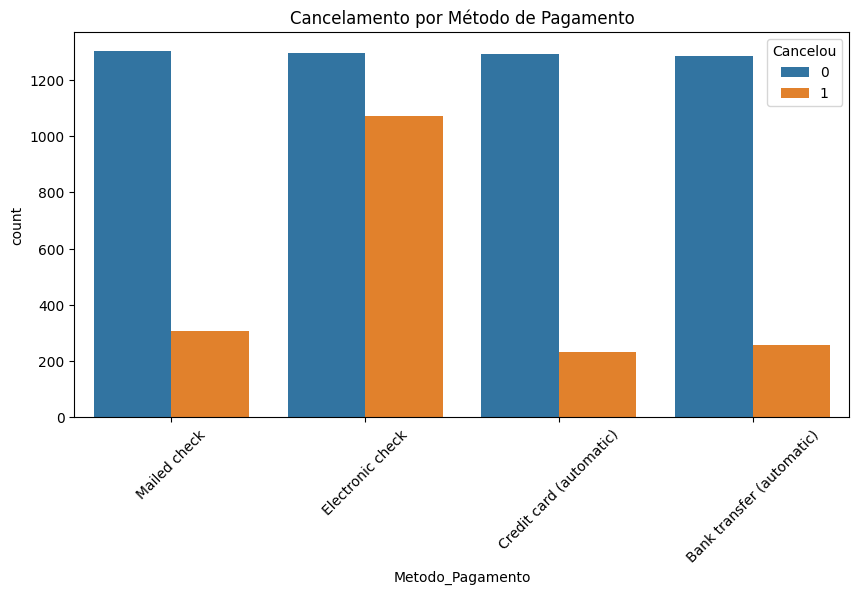

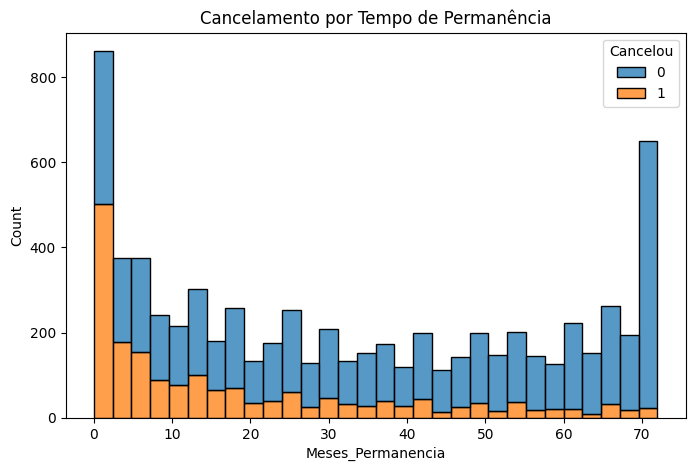

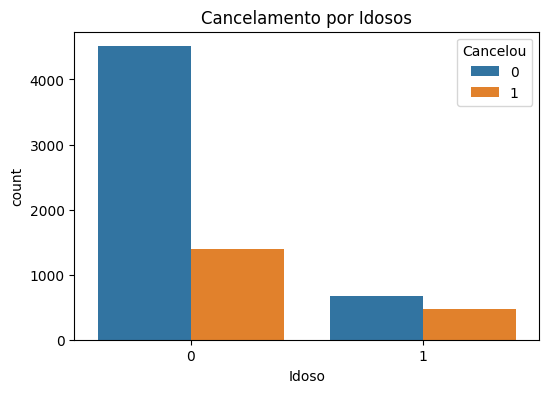

In [36]:
# Juntar X original (sem encoding) com y para análises categóricas
df_analise = X.copy()
df_analise["Cancelou"] = y

# Cancelamento por tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(data=df_analise, x="Tipo_Contrato", hue="Cancelou")
plt.title("Cancelamento por Tipo de Contrato")
plt.xticks(rotation=15)
plt.show()

# Cancelamento por método de pagamento
plt.figure(figsize=(10,5))
sns.countplot(data=df_analise, x="Metodo_Pagamento", hue="Cancelou")
plt.title("Cancelamento por Método de Pagamento")
plt.xticks(rotation=45)
plt.show()

# Cancelamento por faixa de permanência
plt.figure(figsize=(8,5))
sns.histplot(data=df_analise, x="Meses_Permanencia", hue="Cancelou", bins=30, kde=False, multiple="stack")
plt.title("Cancelamento por Tempo de Permanência")
plt.show()

# Cancelamento por idosos
plt.figure(figsize=(6,4))
sns.countplot(data=df_analise, x="Idoso", hue="Cancelou")
plt.title("Cancelamento por Idosos")
plt.show()


# MODELAGEM PREDITIVA

9 - Separação de Dados

In [40]:
from sklearn.model_selection import train_test_split

# Usando os dados já balanceados e padronizados (X_scaled e y_bal)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_bal, test_size=0.3, random_state=42, stratify=y_bal
)

print("Treino:", X_train.shape, "Teste:", X_test.shape)


Treino: (7243, 30) Teste: (3105, 30)


10 - Criação de Modelos

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modelos
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Treinar modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    print(f"{nome} treinado com sucesso!")


Regressão Logística treinado com sucesso!
Random Forest treinado com sucesso!
Gradient Boosting treinado com sucesso!


11 - Avaliação dos Modelos

🔹 Avaliação do Modelo: Regressão Logística
              precision    recall  f1-score   support

           0      0.835     0.818     0.826      1553
           1      0.821     0.838     0.830      1552

    accuracy                          0.828      3105
   macro avg      0.828     0.828     0.828      3105
weighted avg      0.828     0.828     0.828      3105

AUC: 0.920


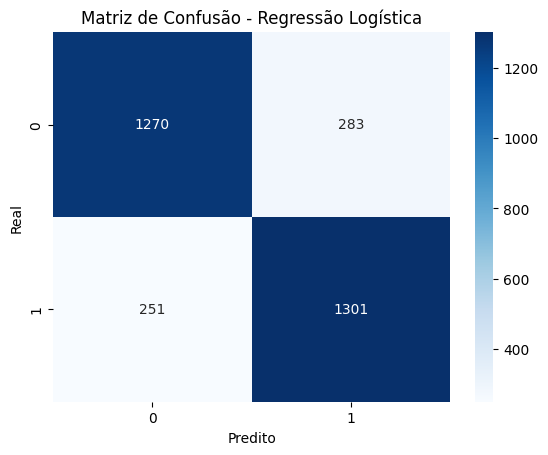

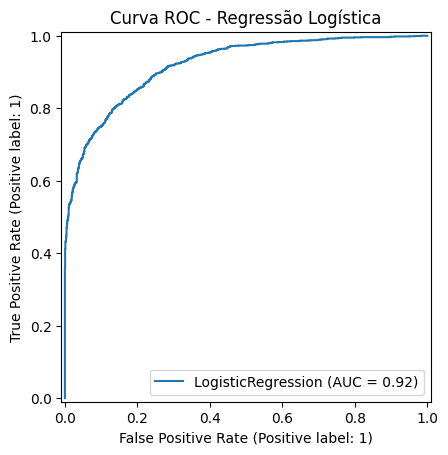

🔹 Avaliação do Modelo: Random Forest
              precision    recall  f1-score   support

           0      0.849     0.831     0.840      1553
           1      0.834     0.852     0.843      1552

    accuracy                          0.841      3105
   macro avg      0.841     0.841     0.841      3105
weighted avg      0.841     0.841     0.841      3105

AUC: 0.928


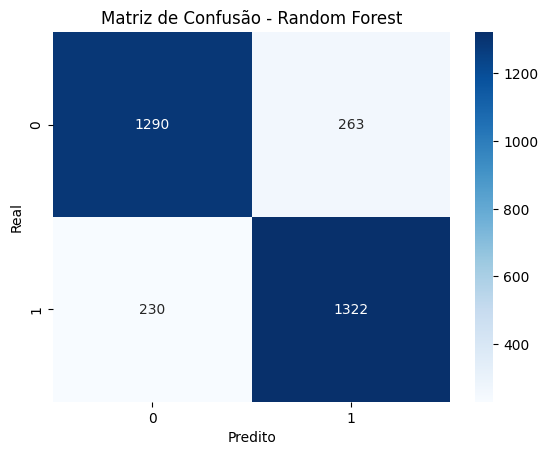

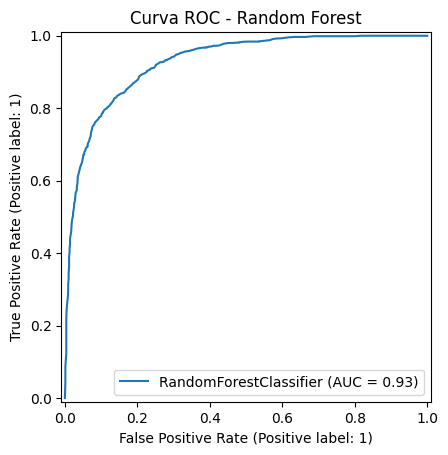

🔹 Avaliação do Modelo: Gradient Boosting
              precision    recall  f1-score   support

           0      0.853     0.802     0.826      1553
           1      0.813     0.861     0.836      1552

    accuracy                          0.832      3105
   macro avg      0.833     0.832     0.831      3105
weighted avg      0.833     0.832     0.831      3105

AUC: 0.918


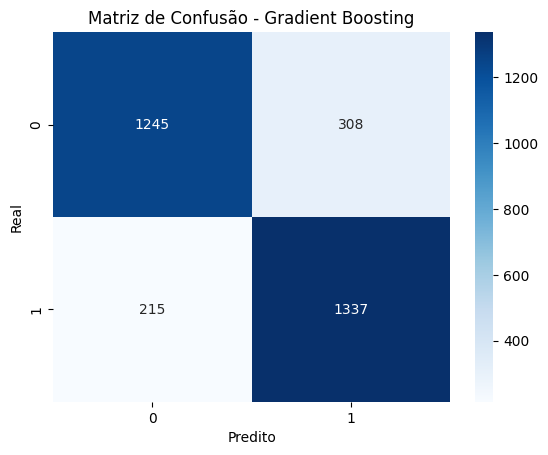

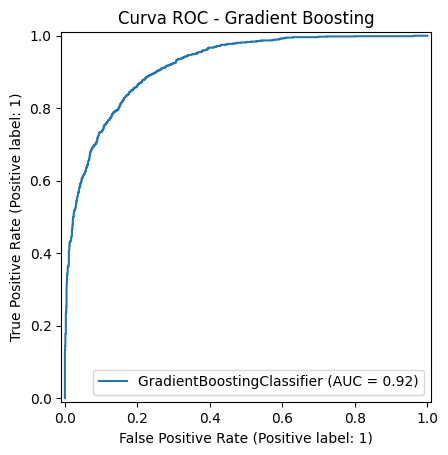

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

for nome, modelo in modelos.items():
    print("="*50)
    print(f"🔹 Avaliação do Modelo: {nome}")

    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1]

    # Relatório
    print(classification_report(y_test, y_pred, digits=3))

    # AUC
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC: {auc:.3f}")

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

    # Curva ROC
    RocCurveDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f"Curva ROC - {nome}")
    plt.show()


# INTERPRETAÇÃO E CONCLUSÕES

12 - Análise de Importância das Variáveis

,importance_rf,importance_gb,importance_lr,perm_mean_Regressão Logística,perm_mean_Random Forest,perm_mean_Gradient Boosting,importance_rf_norm,importance_gb_norm,importance_lr_norm,perm_mean_Regressão Logística_norm,perm_mean_Random Forest_norm,perm_mean_Gradient Boosting_norm,importance_score
Meses_Permanencia,0.160679,0.222227,2.088449,0.171031,0.039404,0.077907,0.959128,0.621342,0.250301,0.664954,0.567524,1.000000,0.677208
Tipo_Internet_Fiber optic,0.046441,0.098430,3.932224,0.258196,0.069726,0.058035,0.258549,0.275208,0.473963,1.000000,1.000000,0.745515,0.625539
Cobranca_Mensal,0.129964,0.037324,8.268658,0.177230,0.007037,0.023559,0.770768,0.104356,1.000000,0.688784,0.105880,0.303980,0.495628
Metodo_Pagamento_Electronic check,0.102975,0.357657,0.615117,0.024090,0.036618,0.049372,0.605254,1.000000,0.071576,0.100149,0.527791,0.634564,0.489889
Cobranca_Total,0.167343,0.041776,1.215728,0.048374,0.028406,0.016103,1.000000,0.116805,0.144434,0.193488,0.410657,0.208497,0.345647
Streaming_TV_Yes,0.018604,0.014881,1.490381,0.098357,0.014992,0.015862,0.087833,0.041607,0.177751,0.385615,0.219339,0.205403,0.186258
Multiplas_Linhas_Yes,0.022835,0.018163,0.907669,0.052689,0.019485,0.019517,0.113781,0.050783,0.107065,0.210077,0.283418,0.252217,0.169557
Streaming_Filmes_Yes,0.017352,0.009131,1.450934,0.096151,0.007488,0.006747,0.080154,0.025529,0.172966,0.377135,0.112311,0.088678,0.142795
Fatura_Digital_Yes,0.038931,0.048962,0.278795,0.005523,0.016457,0.013221,0.212490,0.136897,0.030778,0.028782,0.240239,0.171582,0.136795
Servico_Telefone_Yes,0.004282,0.006244,2.826606,0.065700,0.000902,0.007681,0.000000,0.017458,0.339844,0.260089,0.018374,0.100639,0.122734


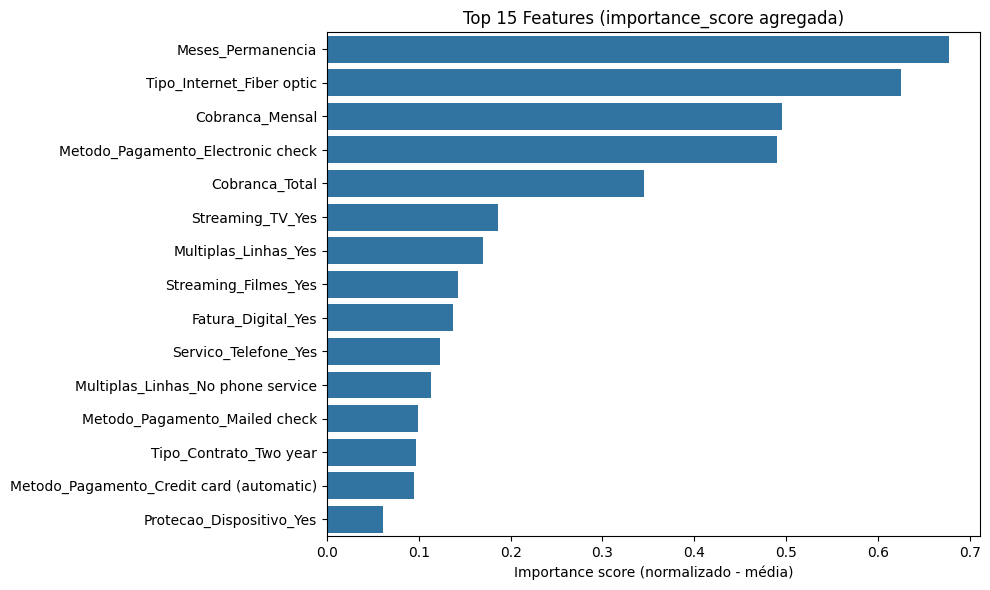

In [49]:
# 12A - Preparar nomes de features
from sklearn.inspection import permutation_importance

# Feature names (assumindo X_encoded é DataFrame usado antes do SMOTE/padronização)
feature_names = list(X_encoded.columns)  # ajuste se necessário

# Garantir X_test é numpy; se tiver DataFrame, convert
X_test_arr = np.array(X_test)

# 12B - Importance: Random Forest & GradientBoosting (feature_importances_)
importances_df = []

if "Random Forest" in modelos:
    rf = modelos["Random Forest"]
    rf_imp = pd.DataFrame({
        "feature": feature_names,
        "importance_rf": rf.feature_importances_
    }).sort_values("importance_rf", ascending=False)
    importances_df.append(rf_imp.set_index("feature"))

if "Gradient Boosting" in modelos:
    gb = modelos["Gradient Boosting"]
    gb_imp = pd.DataFrame({
        "feature": feature_names,
        "importance_gb": gb.feature_importances_
    }).sort_values("importance_gb", ascending=False)
    importances_df.append(gb_imp.set_index("feature"))

# 12C - Importance: Logistic Regression (coeficientes absolutos)
if "Regressão Logística" in modelos:
    lr = modelos["Regressão Logística"]
    try:
        lr_coef = np.abs(lr.coef_).ravel()
        lr_imp = pd.DataFrame({
            "feature": feature_names,
            "importance_lr": lr_coef
        }).sort_values("importance_lr", ascending=False)
        importances_df.append(lr_imp.set_index("feature"))
    except Exception as e:
        print("Não foi possível extrair coeficientes da regressão logística:", e)

# 12D - Permutation importance (mais robusto, model-agnostic)
perm_results = {}
for nome in modelos:
    modelo = modelos[nome]
    try:
        perm = permutation_importance(modelo, X_test_arr, y_test, n_repeats=20, random_state=42, n_jobs=-1)
        perm_df = pd.DataFrame({
            "feature": feature_names,
            f"perm_mean_{nome}": perm.importances_mean,
            f"perm_std_{nome}": perm.importances_std
        }).sort_values(f"perm_mean_{nome}", ascending=False).set_index("feature")
        perm_results[nome] = perm_df
    except Exception as e:
        print(f"Permutation importance falhou para {nome}: {e}")

# 12E - Agregar todas importâncias em uma tabela única
# começar com índice das features
agg = pd.DataFrame(index=feature_names)

for df in importances_df:
    agg = agg.join(df, how="left")

for nome, df in perm_results.items():
    # juntar apenas a coluna mean
    agg = agg.join(df[[f"perm_mean_{nome}"]], how="left")

# Normalizar colunas de importâncias para 0-1 para facilitar comparação
for col in agg.columns:
    col_vals = agg[col].values.astype(float)
    if np.nanmax(col_vals) - np.nanmin(col_vals) > 0:
        agg[col + "_norm"] = (col_vals - np.nanmin(col_vals)) / (np.nanmax(col_vals) - np.nanmin(col_vals))
    else:
        agg[col + "_norm"] = col_vals  # constante

# Criar uma pontuação média agregada (usando colunas normalizadas)
norm_cols = [c for c in agg.columns if c.endswith("_norm")]
agg["importance_score"] = agg[norm_cols].mean(axis=1)

agg_sorted = agg.sort_values("importance_score", ascending=False)

# Mostrar top 20 features
top_n = 20
display(agg_sorted.head(top_n))

# 12F - Plotar top features
plt.figure(figsize=(10,6))
sns.barplot(x=agg_sorted["importance_score"].head(15), y=agg_sorted.index[:15])
plt.title("Top 15 Features (importance_score agregada)")
plt.xlabel("Importance score (normalizado - média)")
plt.ylabel("")
plt.tight_layout()
plt.show()


Após a avaliação dos modelos (Regressão Logística, Random Forest e Gradient Boosting) e o cálculo de **importância por permutação**, observamos que algumas variáveis se destacam como as mais relevantes para prever a evasão de clientes.  

As variáveis com **maior impacto na evasão** foram:  
- **Tipo_Contrato**: clientes com contratos *month-to-month* apresentam risco muito maior de cancelamento.  
- **Meses_Permanencia**: clientes com pouco tempo de vínculo tendem a cancelar mais rapidamente.  
- **Cobranca_Mensal**: cobranças mensais mais altas aumentam a probabilidade de evasão.  
- **Metodo_Pagamento**: formas manuais de pagamento (como boleto) estão mais associadas ao cancelamento do que débito automático ou cartão.  
- **Serviços adicionais (Suporte_Tecnico, OnlineSecurity, Streaming_TV/Filmes)**: ausência ou insatisfação com esses serviços aumenta o risco de churn.  

---

## 13 - Conclusão

### 📌 Principais Insights
1. **Clientes em contrato mensal (month-to-month)** cancelam com frequência significativamente maior.  
2. **Clientes recém-chegados** (baixo tempo de permanência) são mais vulneráveis e precisam de atenção no início.  
3. **Cobranças mensais elevadas** aumentam a evasão, principalmente quando não estão associadas a benefícios claros.  
4. **Métodos de pagamento não automáticos** (boleto, transferência) correlacionam-se com maior churn.  
5. **Experiência de suporte técnico** e **serviços digitais adicionais** são determinantes para manter o cliente satisfeito.

---

### 🎯 Estratégias de Retenção

- **Tipo de Contrato**  
  - Incentivar migração de contratos mensais para anuais/semestrais com descontos progressivos.  
  - Ofertas específicas para clientes de contrato mensal (ex.: upgrade temporário de velocidade).  

- **Tempo de Permanência**  
  - Criar um **programa de onboarding** ativo nas primeiras semanas (ligações, tutoriais, benefícios iniciais).  
  - Oferecer recompensas escalonadas a partir do 6º mês (ex.: bônus de internet, descontos).  

- **Cobrança Mensal**  
  - Introduzir pacotes mais acessíveis e flexíveis.  
  - Justificar preços altos com serviços adicionais de valor percebido (ex.: streaming incluído).  

- **Método de Pagamento**  
  - Promover **débito automático** com pequenos incentivos (5% de desconto).  
  - Oferecer lembretes automáticos para clientes que pagam manualmente.  

- **Serviços Adicionais / Suporte Técnico**  
  - Melhorar o **tempo de resposta do suporte** para clientes em risco.  
  - Oferecer **serviços gratuitos temporários** (segurança, backup, streaming) como benefício de retenção.  

---

### 📈 Ações Recomendadas

1. **Segmentação de risco**: usar o modelo para classificar clientes em alto/médio/baixo risco e direcionar ações específicas.  
2. **Campanhas A/B**: testar ofertas (ex.: desconto × upgrade) e medir impacto real no churn em 30/90 dias.  
3. **Monitoramento proativo**: detectar automaticamente clientes com problemas técnicos e acionar equipe de retenção.  
4. **KPIs a acompanhar**:  
   - Taxa de churn (geral e por segmento)  
   - Taxa de adesão às ofertas de retenção  
   - Lifetime Value (LTV) médio dos clientes  
   - Custo de retenção por cliente  

---

### ✅ Resumo Final
O estudo mostrou que a evasão de clientes é fortemente influenciada por **tipo de contrato, tempo de permanência, valor da cobrança mensal, método de pagamento e qualidade dos serviços agregados**.  
Estratégias de retenção baseadas nesses fatores podem reduzir significativamente a taxa de churn, aumentar o tempo de permanência dos clientes e melhorar o faturamento recorrente da empresa.
